# Importar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

# Leitura dos dados

In [2]:
# Leitura dos dados
df=pd.read_csv('sinasc_ro_2019.csv')

# Exibir colunas ocultas
pd.set_option('max_columns', None)

# Tranformar colunas em snake case
df.columns = df.columns.str.lower()

# Exibir os dados
df.head(5)

,origem,codestab,codmunnasc,locnasc,idademae,estcivmae,escmae,codocupmae,qtdfilvivo,qtdfilmort,codmunres,gestacao,gravidez,parto,consultas,dtnasc,horanasc,sexo,apgar1,apgar5,racacor,peso,idanomal,dtcadastro,codanomal,numerolote,versaosist,dtrecebim,difdata,dtrecoriga,naturalmae,codmunnatu,codufnatu,escmae2010,seriescmae,dtnascmae,racacormae,qtdgestant,qtdpartnor,qtdpartces,idadepai,dtultmenst,semagestac,tpmetestim,consprenat,mesprenat,tpapresent,sttrabpart,stcesparto,tpnascassi,tpfuncresp,tpdocresp,dtdeclarac,escmaeagr1,stdnepidem,stdnnova,codpaisres,tprobson,paridade,kotelchuck,contador,munresstatus,munrestipo,munresnome,munresuf,munreslat,munreslon,munresalt,munresarea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Categorizar a variável apgar5

In [3]:
# Criar função de categorização
def categorizacao(valor):
    if valor >= 8:
        valor='normal'
    elif valor >= 6 and valor <= 7:
        valor='asfixia leve'
    elif valor >= 4 and valor <= 5:
        valor='asfixia moderada'
    elif valor <= 3:
        valor='asfixia grave'
    return valor

# Criar uma nova coluna no dataframe para receber a categorização
df['cat_apgar5'] = 0

# Agregar categorização a nova coluna
df['cat_apgar5'] = df['apgar5'].apply(categorizacao)

# Exibir os dados de interesse para análise
df[['apgar5', 'cat_apgar5']].head(5)

,apgar5,cat_apgar5
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


# Gráfico comparativo

<IPython.core.display.Javascript object>


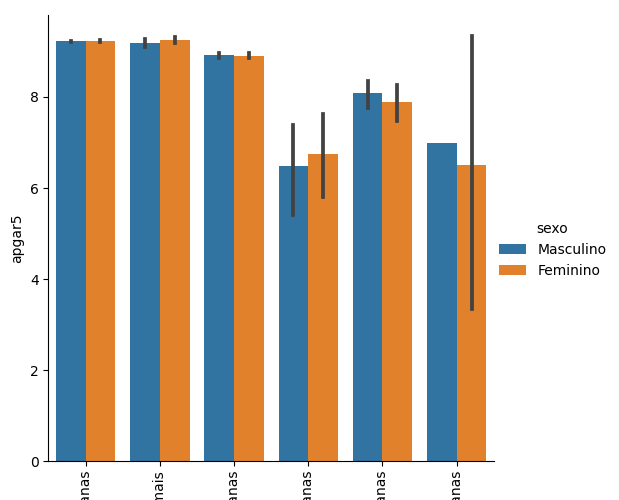

In [27]:
sns.catplot(x='gestacao', y='apgar5', hue='sexo', kind='bar', data=df)
xlabel = plt.xticks(rotation=90)

# Tabela cruzada

In [5]:
freq = pd.crosstab(df['gestacao'], df['apgar5'])
freq

apgar5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
gestacao,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


# Calcular os percentuais de linha

In [17]:
freq_pct_lin = freq.div(freq.sum(axis=1), axis=0)
freq_pct_lin

apgar5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
gestacao,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


<IPython.core.display.Javascript object>


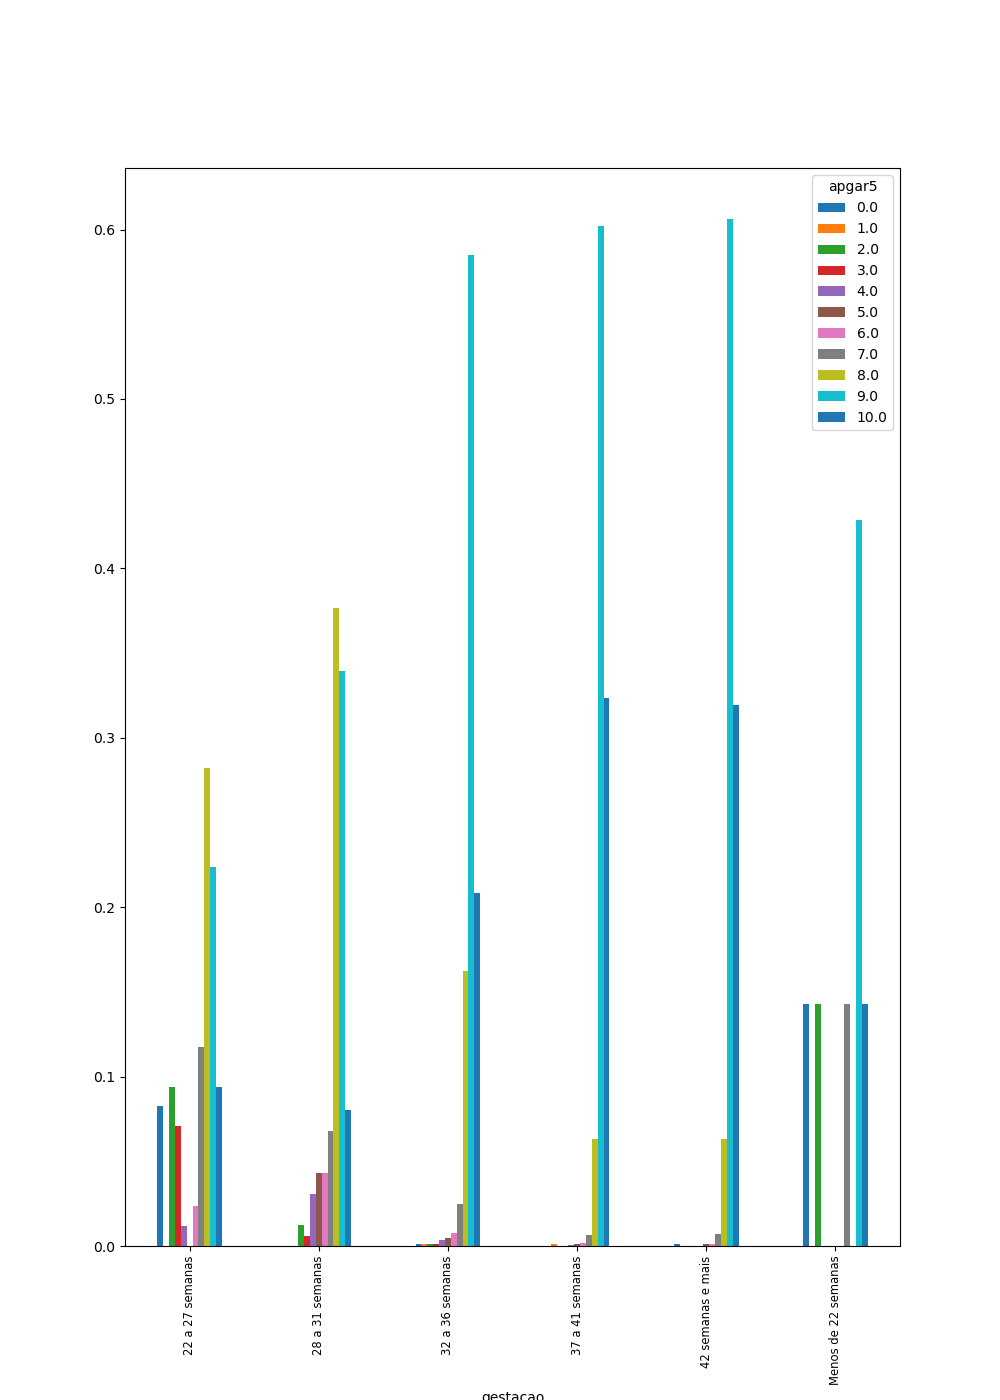

In [25]:
freq_pct_lin.plot.bar(figsize=(10, 14))
plt.tick_params(axis='x', labelrotation=90, labelsize='small')

## Explicativa

Os dados acima não tem relação direta com o fator de partos prematuros, mas podemos validar que a taxa de mortalidade de bebês
prematuros estão em total sentido e relação com o apgar5 que quanto menor maior é a taxa de mortalidade

# Relação apgar5 com peso do bebê

<IPython.core.display.Javascript object>


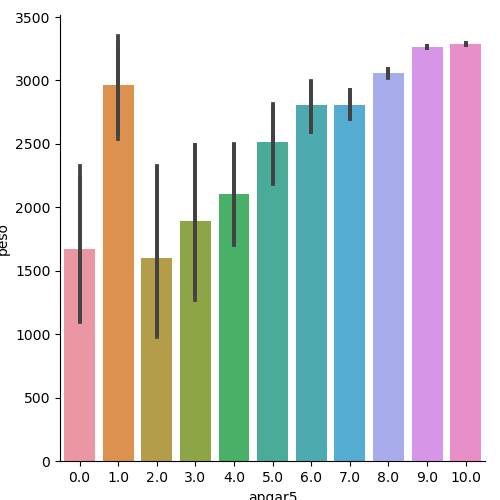

In [9]:
sns.catplot(x='apgar5', y='peso', kind='bar', data=df)

<IPython.core.display.Javascript object>


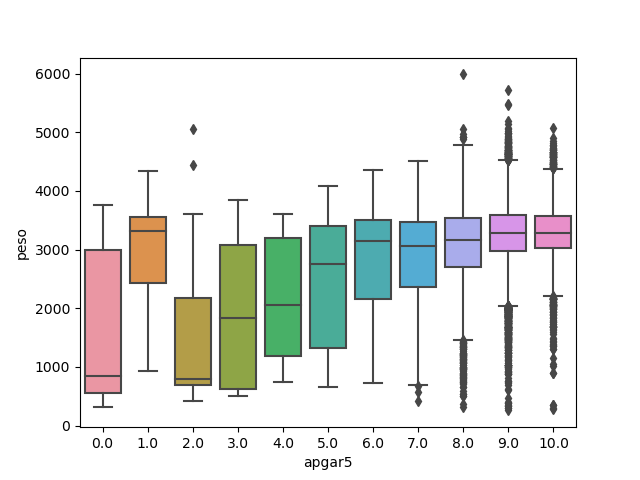

<AxesSubplot:xlabel='apgar5', ylabel='peso'>

In [24]:
fig, axes=plt.subplots(1, 1)
sns.boxplot(x='apgar5', y='peso', data=df)

<IPython.core.display.Javascript object>


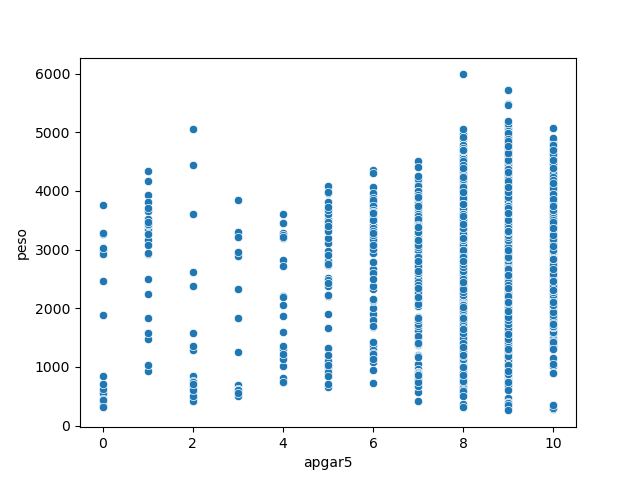

<AxesSubplot:xlabel='apgar5', ylabel='peso'>

In [26]:
fig, axes=plt.subplots(1, 1)
sns.scatterplot(x='apgar5', y='peso', data=df)

## Explicativa

Com os dados analisados acima chegamos a conclusão que os pesos dos bebês tem uma certa relação com o apgar5, podemos analisar
que quanto menor o peso do bebê maior a concetração de apgar5 com valores menores, quanto maior o peso dos bebês maior a concentração de apgar5 com valores superiores